In [1]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score
from sklearn.model_selection import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.externals import joblib

In [2]:
train_df=pd.read_csv("train.csv")

In [3]:
X_train=train_df[["age","fare","Second","Third","male","ischild","family_size"]].values
y_train=train_df["survived"].values

** In *Sklearn* the following steps take place**
- Define the model: by calling the Learning algorithm
```python
model=DecisionTreeClassifier()
```
- We then fit the model object to X and Y 
```python
model=model.fit(X,y)
```
- Finally we perform prediction
```python
prediction=model.predict(X)
```


In [4]:
clf_ranf=RandomForestClassifier(n_estimators=10,max_depth=10,random_state=2301)
clf_ranf=clf_ranf.fit(X_train,y_train)

In [5]:
pred_train=clf_ranf.predict(X_train)

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
score=clf_ranf.score(X_train,y_train)
confusion = confusion_matrix(y_train, pred_train)
print("accuracy:\n{}".format(score))
print("Confusion matrix:\n{}".format(confusion))

accuracy:
0.925561797752809
Confusion matrix:
[[424  15]
 [ 38 235]]


Normalized confusion matrix
[[ 0.96583144  0.03416856]
 [ 0.13919414  0.86080586]]


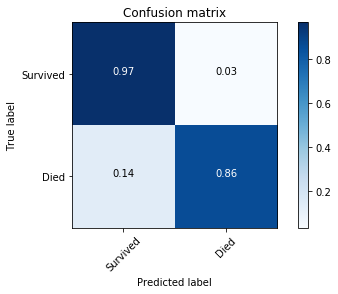

In [8]:
plot_confusion_matrix(confusion,classes=["Survived","Died"],normalize=True)

**Wait** how do we know that I picked the right hyperparameters. Is the model tuned and how will it perform on new data? 
We're going to cheat to show this model both training and test and compare 

In [9]:
test_df=pd.read_csv("test.csv")

In [10]:
X_test=test_df[["age","fare","Second","Third","male","ischild","family_size"]].values
y_test=test_df["survived"].values

** Now We just want to predict on the test data**

In [11]:
pred_test=clf_ranf.predict(X_test)

In [12]:
score=clf_ranf.score(X_test,y_test)
confusion = confusion_matrix(y_test, pred_test)
print("accuracy:\n{}".format(score))
print("Confusion matrix:\n{}".format(confusion))

accuracy:
0.8044692737430168
Confusion matrix:
[[93 17]
 [18 51]]


Normalized confusion matrix
[[ 0.84545455  0.15454545]
 [ 0.26086957  0.73913043]]


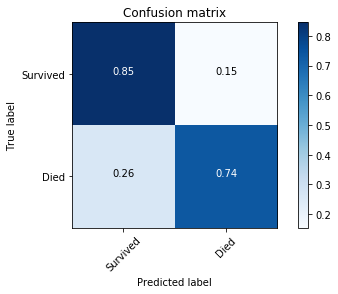

In [13]:
plot_confusion_matrix(confusion,classes=["Survived","Died"],normalize=True)

# Grid Search

* How do we assess optimum number of trees in Random Forest?
* Do we have the right number of min samples per splits?

Grid Search with cross validation gives us the best model with optimized paramters based on the holdout set scores
* Grid Search is essentially a nested for loop for all parameters performed on each cross validation fold
* Scikit learn has a built-in function to perform grid search with minimalist code

<img src="images/Hyperparamter tuning.PNG" alt="Drawing" style="height: 550px";/>
<br>
<font size=2>*Python Machine Learning second edition*</font>

**Kfold Cross Validation**

<img src="images/K-fold.PNG" alt="Drawing" style="height: 500px";/>
<br>
<font size=2>*Python Machine Learning second edition*</font>

In [14]:
'''
creating parameter list
'''
cv_params = {'max_depth': [5,10,100,500], 'n_estimators': [5,10,100,500]}
'''

Defining the learning algorithem
'''
ranf_clf=RandomForestClassifier(random_state=2301,n_jobs=-1)
'''
initializing Grid Search method
'''
gs = GridSearchCV(estimator=ranf_clf,param_grid=cv_params,cv=10,return_train_score=False);

In [15]:
gs.fit(X_train, y_train);

In [16]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,std_fit_time,std_score_time,std_test_score
0,0.113949,0.106117,0.799157,5,5,"{'max_depth': 5, 'n_estimators': 5}",14,0.750000,0.819444,0.736111,0.845070,0.830986,0.845070,0.845070,0.816901,0.802817,0.700000,0.005627,0.002553,0.049183
1,0.126037,0.108019,0.823034,5,10,"{'max_depth': 5, 'n_estimators': 10}",5,0.750000,0.819444,0.819444,0.859155,0.845070,0.845070,0.845070,0.830986,0.873239,0.742857,0.008932,0.002825,0.041316
2,0.192228,0.104155,0.830056,5,100,"{'max_depth': 5, 'n_estimators': 100}",1,0.777778,0.875000,0.805556,0.859155,0.845070,0.873239,0.816901,0.830986,0.887324,0.728571,0.033661,0.001156,0.046810
3,0.781837,0.156832,0.827247,5,500,"{'max_depth': 5, 'n_estimators': 500}",4,0.777778,0.875000,0.805556,0.845070,0.845070,0.859155,0.816901,0.830986,0.887324,0.728571,0.061715,0.052464,0.044942
4,0.117267,0.108846,0.810393,10,5,"{'max_depth': 10, 'n_estimators': 5}",7,0.763889,0.875000,0.805556,0.859155,0.816901,0.802817,0.802817,0.774648,0.859155,0.742857,0.007414,0.002452,0.041338
5,0.128298,0.109361,0.823034,10,10,"{'max_depth': 10, 'n_estimators': 10}",5,0.777778,0.875000,0.833333,0.859155,0.845070,0.816901,0.816901,0.802817,0.887324,0.714286,0.007471,0.002198,0.047881
6,0.214827,0.106643,0.828652,10,100,"{'max_depth': 10, 'n_estimators': 100}",2,0.777778,0.888889,0.833333,0.845070,0.845070,0.816901,0.816901,0.830986,0.873239,0.757143,0.041330,0.001815,0.037599
7,0.766216,0.177944,0.828652,10,500,"{'max_depth': 10, 'n_estimators': 500}",2,0.777778,0.875000,0.833333,0.859155,0.816901,0.859155,0.816901,0.802817,0.901408,0.742857,0.042619,0.048924,0.044859
8,0.121317,0.109378,0.793539,100,5,"{'max_depth': 100, 'n_estimators': 5}",15,0.750000,0.805556,0.819444,0.873239,0.788732,0.830986,0.802817,0.732394,0.788732,0.742857,0.011003,0.004211,0.041061
9,0.121274,0.106548,0.810393,100,10,"{'max_depth': 100, 'n_estimators': 10}",7,0.763889,0.819444,0.819444,0.887324,0.816901,0.845070,0.788732,0.774648,0.873239,0.714286,0.009218,0.003457,0.049252


In [17]:
pred_train=gs.predict(X_train)

In [18]:
score=clf_ranf.score(X_train,y_train)
confusion = confusion_matrix(y_train, pred_train)
print("accuracy:\n{}".format(score))
print("Confusion matrix:\n{}".format(confusion))

accuracy:
0.925561797752809
Confusion matrix:
[[409  30]
 [ 77 196]]


Normalized confusion matrix
[[ 0.93166287  0.06833713]
 [ 0.28205128  0.71794872]]


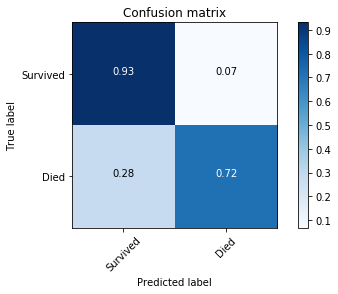

In [19]:
plot_confusion_matrix(confusion,classes=["Survived","Died"],normalize=True)

### Apply model to test data

In [20]:
test_df=pd.read_csv("test.csv")

In [21]:
X_test=test_df[["age","fare","Second","Third","male","ischild","family_size"]].values
y_test=test_df["survived"].values

** Now We just want to predict on the test data**

In [22]:
pred_test=gs.predict(X_test)

In [23]:
score=gs.score(X_test,y_test)
confusion = confusion_matrix(y_test, pred_test)
print("accuracy:\n{}".format(score))
print("Confusion matrix:\n{}".format(confusion))

accuracy:
0.8212290502793296
Confusion matrix:
[[95 15]
 [17 52]]


Normalized confusion matrix
[[ 0.86363636  0.13636364]
 [ 0.24637681  0.75362319]]


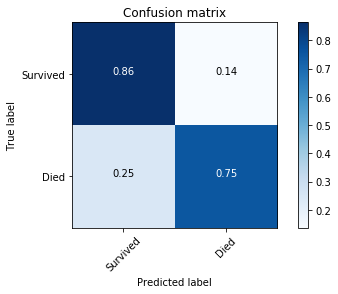

In [24]:
plot_confusion_matrix(confusion,classes=["Survived","Died"],normalize=True)

** We're about ready to deploy, our last step will be to refit this on the entire data set**

In [25]:
titanic_all=pd.concat([train_df,test_df],ignore_index=True)

In [26]:
X_all=titanic_all[["age","fare","Second","Third","male","ischild","family_size"]].values
y_all=titanic_all["survived"].values

In [27]:
final_model=gs.best_estimator_.fit(X_all,y_all)

### Deploying our model

In [28]:
joblib.dump(final_model,'titanic_ranf.pkl');

<!--NAVIGATION-->
##### < [Statistical Analysis with StatsModels](04_statsmodels.ipynb) | [Contents](00_Index.ipynb#4--Statistical-Analysis-with-StatsModels) | [Deep Learning with Keras](06_deeplearning.ipynb)>